In [22]:
#other useful packages
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Import Qiskit
from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [23]:
#Super secret message
mes = 'hello world'
print('Your super secret message: ',mes)

#initial size of key
n = len(mes)*3

#break up message into smaller parts if length > 10
nlist = []
for i in range(int(n/10)):
    nlist.append(10)
if n%10 != 0:
    nlist.append(n%10)

print('Initial key length: ',n)

Your super secret message:  hello world
Initial key length:  33


In [25]:
def randomStringGen(string_length):
    #output variables used to access quantum computer results at the end of the function
    output_list = []
    output = ''
    
    #start up your quantum circuit information
    backend = BasicAer.get_backend('qasm_simulator')  
    circuits = ['rs']
    
    #run circuit in batches of 10 qubits for fastest results. The results
    #from each run will be appended and then clipped down to the right n size.
    n = string_length
    temp_n = 10
    temp_output = ''
    for i in range(math.ceil(n/temp_n)):
        #initialize quantum registers for circuit
        q = QuantumRegister(temp_n, name='q')
        c = ClassicalRegister(temp_n, name='c')
        rs = QuantumCircuit(q, c, name='rs')
            
        #create temp_n number of qubits all in superpositions
        for i in range(temp_n):
            rs.h(q[i]) #the .h gate is the Hadamard gate that makes superpositions
            rs.measure(q[i],c[i])
            rs.draw(output = 'mpl')

        #execute circuit and extract 0s and 1s from key
        result = execute(rs, backend, shots=1).result()
        counts = result.get_counts(rs)
        result_key = list(result.get_counts(rs).keys())
        temp_output = result_key[0]
        output += temp_output
        
    #return output clipped to size of desired string length
    return output[:n]

In [26]:
#intial key genrated
key = randomStringGen(n)
print('Initial key: ',key)

Initial key:  101111000111011110101000010011000


In [27]:
temp_n = 10  
q = QuantumRegister(temp_n, name='q')
c = ClassicalRegister(temp_n, name='c')
rs = QuantumCircuit(q, c, name='rs')
backend = BasicAer.get_backend('qasm_simulator') 

for i in range(temp_n):
            rs.h(q[i]) #the .h gate is the Hadamard gate that makes superpositions
            rs.measure(q[i],c[i])

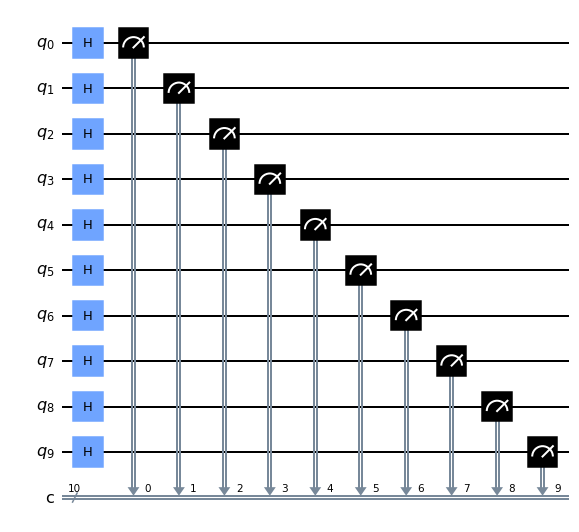

In [28]:
#Draw circuit of intial key
rs.draw(output = 'mpl')

In [29]:
result = execute(rs, backend, shots=1).result()

In [30]:
from qiskit.tools.visualization import plot_histogram

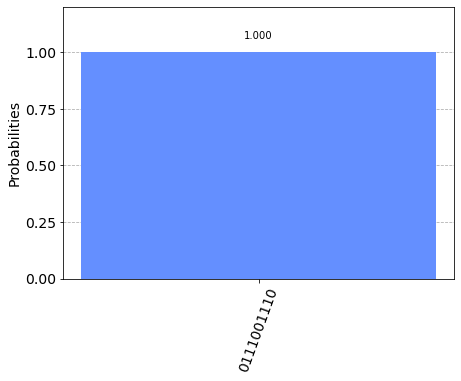

In [31]:
#plot histogram of Alice intial key
plot_histogram(result.get_counts(rs))

In [32]:
# Make Alice's rotation string

def randomStringGen(string_length):
    #output variables used to access quantum computer results at the end of the function
    output_list = []
    output = ''
    
    #start up your quantum circuit information
    backend = BasicAer.get_backend('qasm_simulator')  
    circuits = ['alice']
    
    #run circuit in batches of 10 qubits for fastest results. The results
    #from each run will be appended and then clipped down to the right n size.
    n = string_length
    temp_n = 10
    temp_output = ''
    for i in range(math.ceil(n/temp_n)):
        #initialize quantum registers for circuit
        q = QuantumRegister(temp_n, name='q')
        c = ClassicalRegister(temp_n, name='c')
        alice = QuantumCircuit(q, c, name='alice')
            
        #create temp_n number of qubits all in superpositions
        for i in range(temp_n):
            alice.h(q[i]) #the .h gate is the Hadamard gate that makes superpositions
            alice.measure(q[i],c[i])

        #execute circuit and extract 0s and 1s from key
        result = execute(alice, backend, shots=1).result()
        counts = result.get_counts(alice)
        result_key = list(result.get_counts(alice).keys())
        temp_output = result_key[0]
        output += temp_output
        
    #return output clipped to size of desired string length
    return output[:n]

In [33]:
Alice_rotate = randomStringGen(n)

In [34]:
print("Alice's rotation string:",Alice_rotate)

Alice's rotation string: 111010010000001011000001001101110


In [35]:
temp_n = 10  
q = QuantumRegister(temp_n, name='q')
c = ClassicalRegister(temp_n, name='c')
alice = QuantumCircuit(q, c, name='alice')
backend = BasicAer.get_backend('qasm_simulator') 

for i in range(temp_n):
            alice.h(q[i]) #the .h gate is the Hadamard gate that makes superpositions
            alice.measure(q[i],c[i])

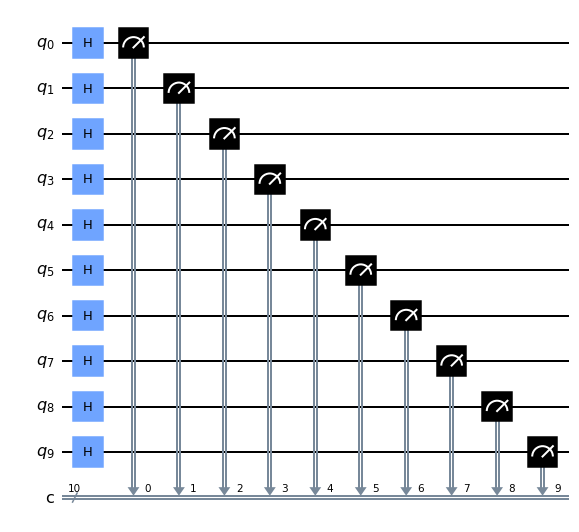

In [36]:
#Draw circuit of Alice's rotation string
alice.draw(output = 'mpl')

In [37]:
result = execute(alice, backend, shots=1).result()

In [38]:
from qiskit.tools.visualization import plot_histogram

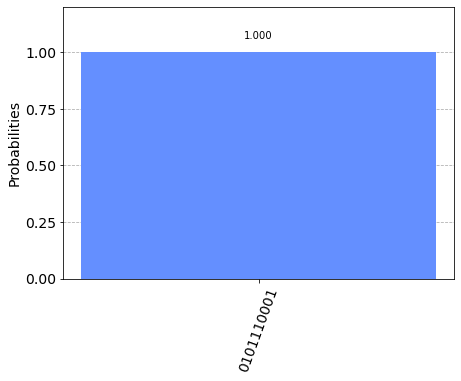

In [39]:
#plot histogram of Alice's rotation string
plot_histogram(result.get_counts(alice))

In [40]:
# Make Bob's rotation string

def randomStringGen(string_length):
    #output variables used to access quantum computer results at the end of the function
    output_list = []
    output = ''
    
    #start up your quantum circuit information
    backend = BasicAer.get_backend('qasm_simulator')  
    circuits = ['Bob']
    
    #run circuit in batches of 10 qubits for fastest results. The results
    #from each run will be appended and then clipped down to the right n size.
    n = string_length
    temp_n = 10
    temp_output = ''
    for i in range(math.ceil(n/temp_n)):
        #initialize quantum registers for circuit
        q = QuantumRegister(temp_n, name='q')
        c = ClassicalRegister(temp_n, name='c')
        Bob = QuantumCircuit(q, c, name='Bob')
            
        #create temp_n number of qubits all in superpositions
        for i in range(temp_n):
            Bob.h(q[i]) #the .h gate is the Hadamard gate that makes superpositions
            Bob.measure(q[i],c[i])

        #execute circuit and extract 0s and 1s from key
        result = execute(Bob, backend, shots=1).result()
        counts = result.get_counts(Bob)
        result_key = list(result.get_counts(Bob).keys())
        temp_output = result_key[0]
        output += temp_output
        
    #return output clipped to size of desired string length
    return output[:n]

In [41]:
Bob_rotate = randomStringGen(n)

In [42]:
print("Bob's rotation string:  ",Bob_rotate)

Bob's rotation string:   101011100110001011110001010001101


In [43]:
temp_n = 10  
q = QuantumRegister(temp_n, name='q')
c = ClassicalRegister(temp_n, name='c')
Bob = QuantumCircuit(q, c, name='Bob')
backend = BasicAer.get_backend('qasm_simulator') 

for i in range(temp_n):
            Bob.h(q[i]) #the .h gate is the Hadamard gate that makes superpositions
            Bob.measure(q[i],c[i])

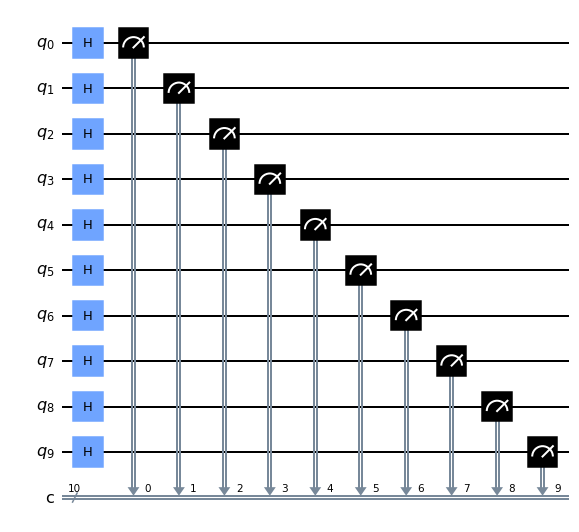

In [44]:
#Draw ciruit of Bob's rotation string
Bob.draw(output = 'mpl')

In [45]:
result = execute(Bob, backend, shots=1).result()

In [46]:
from qiskit.tools.visualization import plot_histogram

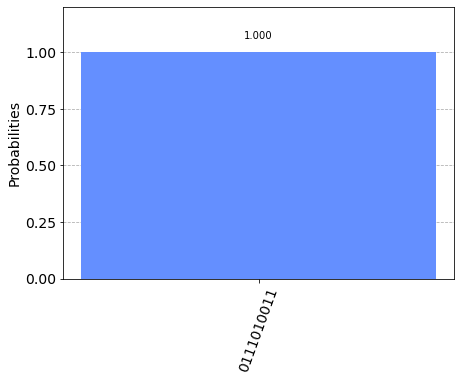

In [47]:
#plot histogram of Bob's rotation string
plot_histogram(result.get_counts(Bob))

In [48]:
backend = BasicAer.get_backend('qasm_simulator')  
shots = 1
circuits = ['send_over']
Bob_result = ''

for ind,l in enumerate(nlist):
    #define temp variables used in breaking up quantum program if message length > 10
    if l < 10:
        key_temp = key[10*ind:10*ind+l]
        Ar_temp = Alice_rotate[10*ind:10*ind+l]
        Br_temp = Bob_rotate[10*ind:10*ind+l]
    else:
        key_temp = key[l*ind:l*(ind+1)]
        Ar_temp = Alice_rotate[l*ind:l*(ind+1)]
        Br_temp = Bob_rotate[l*ind:l*(ind+1)]
    
    #start up the rest of your quantum circuit information
    q = QuantumRegister(l, name='q')
    c = ClassicalRegister(l, name='c')
    send_over = QuantumCircuit(q, c, name='send_over')
    
    #prepare qubits based on key; add Hadamard gates based on Alice's and Bob's
    #rotation strings
    for i,j,k,n in zip(key_temp,Ar_temp,Br_temp,range(0,len(key_temp))):
        i = int(i)
        j = int(j)
        k = int(k)
        if i > 0:
            send_over.x(q[n])
        #Look at Alice's rotation string
        if j > 0:
            send_over.h(q[n])
        #Look at Bob's rotation string
        if k > 0:
            send_over.h(q[n])
        send_over.measure(q[n],c[n])

    #execute quantum circuit
    result_so = execute([send_over], backend, shots=shots).result()
    counts_so = result_so.get_counts(send_over)
    result_key_so = list(result_so.get_counts(send_over).keys())
    Bob_result += result_key_so[0][::-1]
    
print("Bob's results: ", Bob_result)

Bob's results:  111110000111011110101000001011010


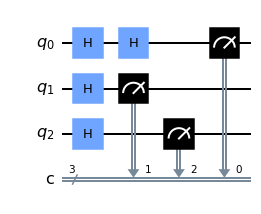

In [49]:
#Draw circuit of Bob's results
send_over.draw(output = 'mpl')

In [50]:
result = execute( send_over,backend,shots=1).result()

In [51]:
from qiskit.tools.visualization import plot_histogram

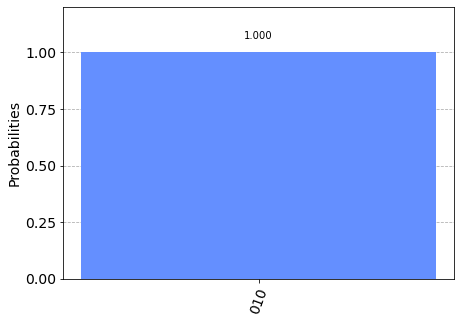

In [52]:
#plot histogram of Bob's results
plot_histogram(result.get_counts(send_over))

In [53]:
def makeKey(rotation1,rotation2,results):
    key = ''
    count = 0
    for i,j in zip(rotation1,rotation2):
        if i == j:
            key += results[count]
        count += 1
    return key
  
Akey = makeKey(Bob_rotate,Alice_rotate,key)
Bkey = makeKey(Bob_rotate,Alice_rotate,Bob_result)

print("Alice's key:",Akey)
print("Bob's key:  ",Bkey)

Alice's key: 11110101111010000110
Bob's key:   11110101111010000110


In [54]:
#make key same length has message
shortened_Akey = Akey[:len(mes)]
encoded_m=''

#encrypt message mes using encryption key final_key
for m,k in zip(mes,shortened_Akey):
    encoded_c = chr(ord(m) + 2*ord(k) % 256)
    encoded_m += encoded_c
print('encoded message:  ',encoded_m)

#make key same length has message
shortened_Bkey = Bkey[:len(mes)]

#decrypt message mes using encryption key final_key
result = ''
for m,k in zip(encoded_m,shortened_Bkey):
    encoded_c = chr(ord(m) - 2*ord(k) % 256)
    result += encoded_c
print('recovered message:',result)

encoded message:   ÊÇÎÎÏ×ÑÔÎÆ
recovered message: hello world


In [55]:
backend = BasicAer.get_backend('qasm_simulator')  
shots = 1
circuits = ['Eve']

Eve_result = ''
for ind,l in enumerate(nlist):
    #define temp variables used in breaking up quantum program if message length > 10
    if l < 10:
        key_temp = key[10*ind:10*ind+l]
        Ar_temp = Alice_rotate[10*ind:10*ind+l]
    else:
        key_temp = key[l*ind:l*(ind+1)]
        Ar_temp = Alice_rotate[l*ind:l*(ind+1)]
    
    #start up the rest of your quantum circuit information
    q = QuantumRegister(l, name='q')
    c = ClassicalRegister(l, name='c')
    Eve = QuantumCircuit(q, c, name='Eve')
    
    #prepare qubits based on key; add Hadamard gates based on Alice's and Bob's
    #rotation strings
    for i,j,n in zip(key_temp,Ar_temp,range(0,len(key_temp))):
        i = int(i)
        j = int(j)
        if i > 0:
            Eve.x(q[n])
        if j > 0:
            Eve.h(q[n])
        Eve.measure(q[n],c[n])
    
    #execute
    result_eve = execute(Eve, backend, shots=shots).result()
    counts_eve = result_eve.get_counts()
    result_key_eve = list(result_eve.get_counts().keys())
    Eve_result += result_key_eve[0][::-1]
    
#Alice send string to Bob but Eve intercept string   
print("Eve's results: ", Eve_result)

Eve's results:  010111000111011110101001010110110


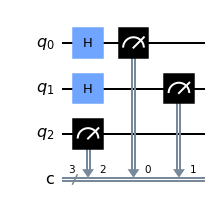

In [56]:
#Draw circuit of Eve
Eve.draw(output = 'mpl')

In [57]:
result = execute( Eve,backend,shots=1).result()

In [58]:
from qiskit.tools.visualization import plot_histogram

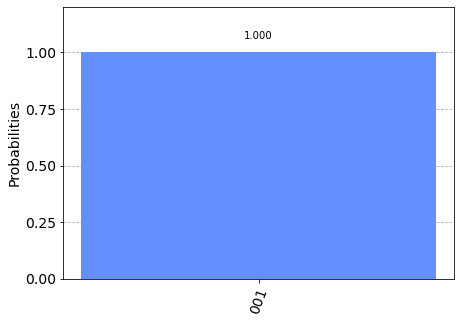

In [59]:
#plot histogram of Eve
plot_histogram(result.get_counts(Eve))

In [60]:
#start up your quantum program
backend = BasicAer.get_backend('qasm_simulator')  
shots = 1
circuits = ['Eve2']

Bob_badresult = ''
for ind,l in enumerate(nlist):
    #define temp variables used in breaking up quantum program if message length > 10
    if l < 10:
        key_temp = key[10*ind:10*ind+l]
        Eve_temp = Eve_result[10*ind:10*ind+l]
        Br_temp = Bob_rotate[10*ind:10*ind+l]
    else:
        key_temp = key[l*ind:l*(ind+1)]
        Eve_temp = Eve_result[l*ind:l*(ind+1)]
        Br_temp = Bob_rotate[l*ind:l*(ind+1)]
    
    #start up the rest of your quantum circuit information
    q = QuantumRegister(l, name='q')
    c = ClassicalRegister(l, name='c')
    Eve2 = QuantumCircuit(q , c, name='Eve2')
    
    #prepare qubits
    for i,j,n in zip(Eve_temp,Br_temp,range(0,len(key_temp))):
        i = int(i)
        j = int(j)
        if i > 0:
            Eve2.x(q[n])
        if j > 0:
            Eve2.h(q[n])
        Eve2.measure(q[n],c[n])
    
    #execute
    result_eve = execute(Eve2, backend, shots=shots).result()
    counts_eve = result_eve.get_counts()
    result_key_eve = list(result_eve.get_counts().keys())
    Bob_badresult += result_key_eve[0][::-1]
    
print("Bob's previous results (w/o Eve):",Bob_result)
print("Bob's results from Eve:\t\t ",Bob_badresult)


Bob's previous results (w/o Eve): 111110000111011110101000001011010
Bob's results from Eve:		  011110000011010110001001010110010


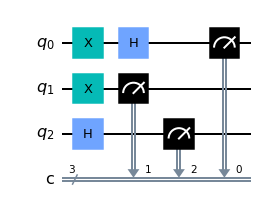

In [61]:
#Draw circuit of Eve2
#After intercpet Alice string,eve change some qubit send to Bob then get Bob_badresult
Eve2.draw(output = 'mpl')

In [63]:
result = execute( Eve2,backend,shots=1).result()

In [64]:
from qiskit.tools.visualization import plot_histogram

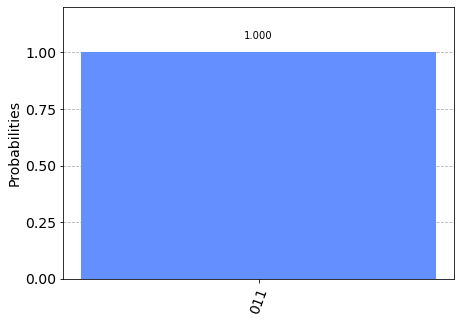

In [65]:
#plot histogram of Eve2
plot_histogram(result.get_counts(Eve2))

In [66]:
#make keys for Alice and Bob
Akey = makeKey(Bob_rotate,Alice_rotate,key)
Bkey = makeKey(Bob_rotate,Alice_rotate,Bob_badresult)
print("Alice's key:   ",Akey)
print("Bob's key:     ",Bkey)

check_key = randomStringGen(len(Akey))
print('spots to check:',check_key)

Alice's key:    11110101111010000110
Bob's key:      01110101011010010100
spots to check: 01101001111000011001


In [67]:
#find which values in rotation string were used to make the key
Alice_keyrotate = makeKey(Bob_rotate,Alice_rotate,Alice_rotate)
Bob_keyrotate = makeKey(Bob_rotate,Alice_rotate,Bob_rotate)

# Detect Eve's interference
#extract a subset of Alice's key
sub_Akey = ''
sub_Arotate = ''
count = 0
for i,j in zip(Alice_rotate,Akey):
    if int(check_key[count]) == 1:
        sub_Akey += Akey[count]
        sub_Arotate += Alice_keyrotate[count]
    count += 1

#extract a subset of Bob's key
sub_Bkey = ''
sub_Brotate = ''
count = 0
for i,j in zip(Bob_rotate,Bkey):
    if int(check_key[count]) == 1:
        sub_Bkey += Bkey[count]
        sub_Brotate += Bob_keyrotate[count]
    count += 1
print("subset of Alice's key:",sub_Akey)
print("subset of Bob's key:  ",sub_Bkey)

#compare Alice and Bob's key subsets
secure = True
for i,j in zip(sub_Akey,sub_Bkey):
    if i == j:
        secure = True
    else:
        secure = False
        break;
if not secure:
    print('Eve detected!')
else:
    print('Eve escaped detection!')

subset of Alice's key: 1101111000
subset of Bob's key:   1101011100
Eve detected!


In [68]:
from qiskit import IBMQ

In [69]:
#using API token load IBM quantum
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-06-29 21:06:36,231: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [70]:
provider = IBMQ.get_provider('ibm-q')

In [78]:
qcomp = provider.get_backend('ibmq_qasm_simulator')

In [79]:
job = execute(rs,backend=qcomp)

In [80]:
from qiskit.tools.monitor import job_monitor

In [81]:
job_monitor(job)

Job Status: job has successfully run


In [82]:
result = job.result()

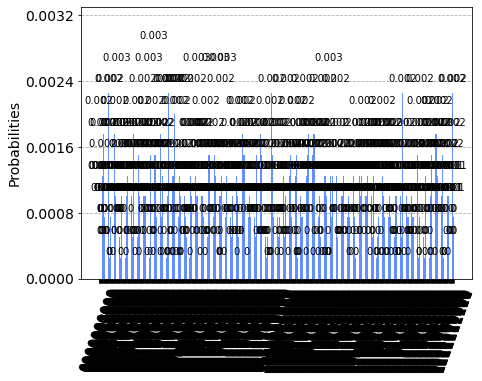

In [83]:
#plot histogram of Alice intial key in IBM quantum
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(rs))

In [84]:
job = execute(alice,backend=qcomp)

In [85]:
from qiskit.tools.monitor import job_monitor

In [86]:
job_monitor(job)

Job Status: job has successfully run


In [87]:
result = job.result()

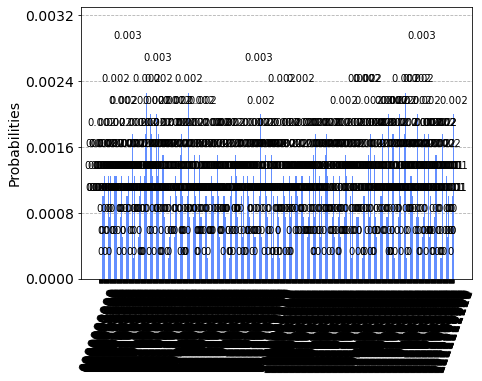

In [88]:
#plot histogram of Alice's rotation string in IBM quantum
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(alice))

In [89]:
job = execute(Bob,backend=qcomp)

In [90]:
from qiskit.tools.monitor import job_monitor

In [91]:
job_monitor(job)

Job Status: job has successfully run


In [92]:
result = job.result()

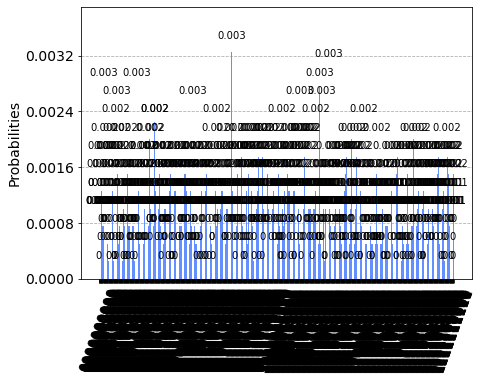

In [93]:
#plot histogram of Bob's rotation string in IBM quantum
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(Bob))

In [94]:
job = execute(send_over,backend=qcomp)

In [95]:
from qiskit.tools.monitor import job_monitor

In [96]:
job_monitor(job)

Job Status: job has successfully run


In [97]:
result = job.result()

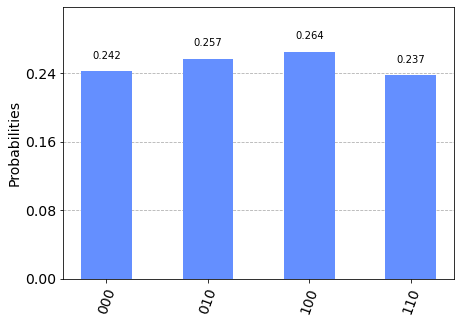

In [98]:
#plot histogram of Bob's results in IBM quantum
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(send_over))

In [99]:
job = execute(Eve,backend=qcomp)

In [100]:
from qiskit.tools.monitor import job_monitor

In [101]:
job_monitor(job)

Job Status: job has successfully run


In [102]:
result = job.result()

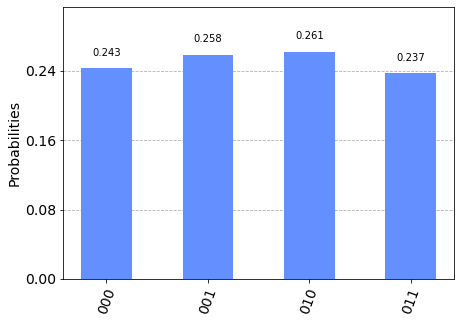

In [103]:
#plot histogram of Eve in IBM quantum
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(Eve))

In [104]:
job = execute(Eve2,backend=qcomp)

In [105]:
from qiskit.tools.monitor import job_monitor

In [106]:
job_monitor(job)

Job Status: job has successfully run


In [107]:
result = job.result()

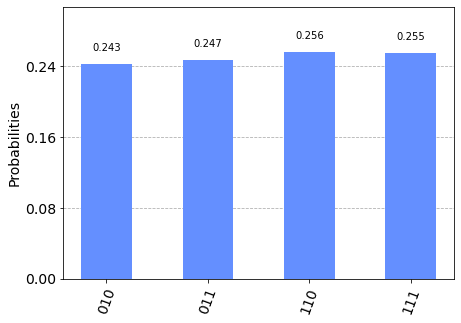

In [108]:
#plot histogram of Eve2 in IBM quantum
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(Eve2))